In [5]:
# !pip install plotly

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import sys
import os
from PIL import Image,ImageChops,ImageEnhance
def ela_image(path, quality=98):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png' 
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    ela_image = ImageChops.difference(image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff 
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)  
    return ela_image

In [3]:
Real_image_path= r"C:\Users\ingle\Documents\Major_Project_II\CASIA2\Au\Au_arc_30447.jpg"
Fake_image_path1= r"C:\Users\ingle\Documents\Major_Project_II\CASIA2\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif"
# Fake_image_path2='/kaggle/input/casia-dataset/casia/CASIA1/Sp/Sp_D_NRN_A_sec0047_cha0007_0559.jpg"

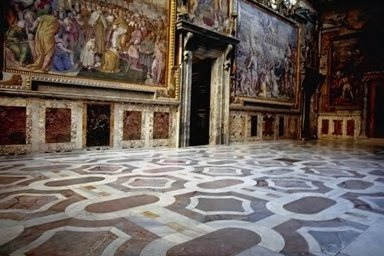

In [4]:
Image.open(Real_image_path)

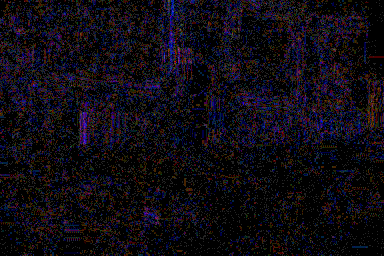

In [5]:
ela_image(Real_image_path)

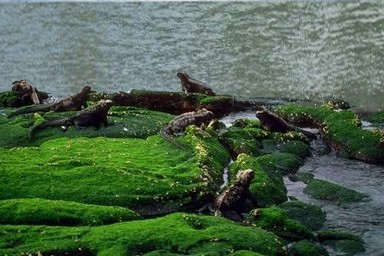

In [6]:
Image.open(Fake_image_path1)

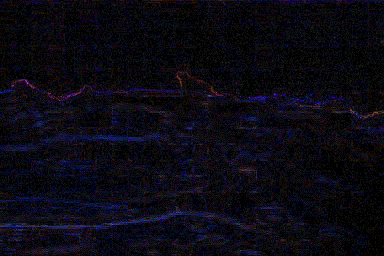

In [7]:
ela_image(Fake_image_path1)

In [8]:
image_size=(128,128)

In [9]:
def preprocessing(image_path):
    return np.array(ela_image(image_path).resize(image_size)).flatten()/255

In [10]:
# import numpy as np
# preprocessing(Fake_image_path2)

In [11]:
X=[]
Y=[]

In [13]:
import random
path = r"C:\Users\ingle\Documents\Major_Project_II\CASIA2\Au"
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(preprocessing(full_path))
            Y.append(1)
random.shuffle(X)
X = X[:2000]
Y = Y[:2000]
print(len(X), len(Y))

2000 2000


In [15]:
len(Y)

2000

In [17]:
# path = r"C:\Users\ingle\Documents\Major_Project_II\CASIA2\Tp"
# for dirname, _, filenames in os.walk(path):
#     for filename in filenames:
#         if filename.endswith('jpg') or filename.endswith('png'):
#             full_path = os.path.join(dirname, filename)
#             X.append(preprocessing(full_path))
#             Y.append(0)

path = r"C:\Users\ingle\Documents\Major_Project_II\CASIA2\Tp"
count = 0
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
#         count += 1
#         if count < 1000:
#             pass
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(preprocessing(full_path))
            Y.append(0)
        if len(Y) % 4000 == 0:
            print(f'Processing {len(Y)} images')
            break
    if len(Y) % 4000 == 0:
        break


print(len(X), len(Y))

Processing 4000 images
4000 4000


In [18]:
from keras.utils import to_categorical

X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=10)
X = X.reshape(-1,1,1,1)

print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3200 3200
800 800


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [4]:
def CNN(input_shape):
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    
    # Second convolutional layer
    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
    
    # Third convolutional layer with max-pooling
    model.add(layers.Conv2D(32, (7, 7), strides=(1, 1), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output before the dense layer
    model.add(layers.Flatten())

    # Dense layer with 256 neurons
    model.add(layers.Dense(256, activation='relu'))

    # Output layer with 2 neurons and sigmoid activation for binary classification
    model.add(layers.Dense(2, activation='sigmoid'))

    return model

# Assuming your input images have a shape of (width, height, channels)
input_shape = (128, 128, 3)  # Adjust this according to your input data
light_cnn_model = CNN(input_shape)

# Display model summary
light_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 118, 118, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 111392)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               28516608  
                                                      

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.9, 
                                            min_lr=0.00001)

In [25]:
from tensorflow.keras.optimizers.legacy import Adam

In [26]:
epochs = 10
batch_size = 16
init_lr = 1e-4

optimizer = Adam(learning_rate = init_lr, decay = init_lr/epochs)
light_cnn_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(X_train)

In [28]:
# Fit the model
history = light_cnn_model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (X_val,Y_val),
                               steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction,earlystopping])

C:\Users\ingle\AppData\Local\Temp\ipykernel_6580\750461848.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = light_cnn_model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


Epoch 1/50


200/200 [==============================] - 107s 529ms/step - loss: 0.4346 - accuracy: 0.7925 - val_loss: 0.3004 - val_accuracy: 0.9025 - lr: 1.0000e-04
Epoch 2/50
200/200 [==============================] - 107s 534ms/step - loss: 0.3329 - accuracy: 0.8750 - val_loss: 0.3045 - val_accuracy: 0.8925 - lr: 1.0000e-04
Epoch 3/50
200/200 [==============================] - ETA: 0s - loss: 0.3040 - accuracy: 0.8925
Epoch 3: ReduceLROnPlateau reducing learning rate to 8.999999772640876e-05.
200/200 [==============================] - 114s 568ms/step - loss: 0.3040 - accuracy: 0.8925 - val_loss: 0.3609 - val_accuracy: 0.8562 - lr: 1.0000e-04
Epoch 4/50
200/200 [==============================] - 93s 463ms/step - loss: 0.2917 - accuracy: 0.8956 - val_loss: 0.2570 - val_accuracy: 0.9200 - lr: 9.0000e-05
Epoch 5/50
200/200 [==============================] - 101s 506ms/step - loss: 0.2828 - accuracy: 0.9003 - val_loss: 0.2453 - val_accuracy: 0.9187 - lr: 9.0000e-05
Epoch 6/50
200/200 [===

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Evaluate the model on test data
loss, accuracy = light_cnn_model.evaluate(X_val, Y_val)
print('Accuracy:', accuracy)

# Predict classes for test data
Y_pred = light_cnn_model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

25/25 [==============================] - 4s 158ms/step - loss: 0.1970 - accuracy: 0.9287
Accuracy: 0.9287499785423279
25/25 [==============================] - 4s 170ms/step
Precision: 0.9638242894056848
Recall: 0.8966346153846154
F1 Score: 0.9290161892901619


In [34]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

25/25 [==============================] - 11s 368ms/step


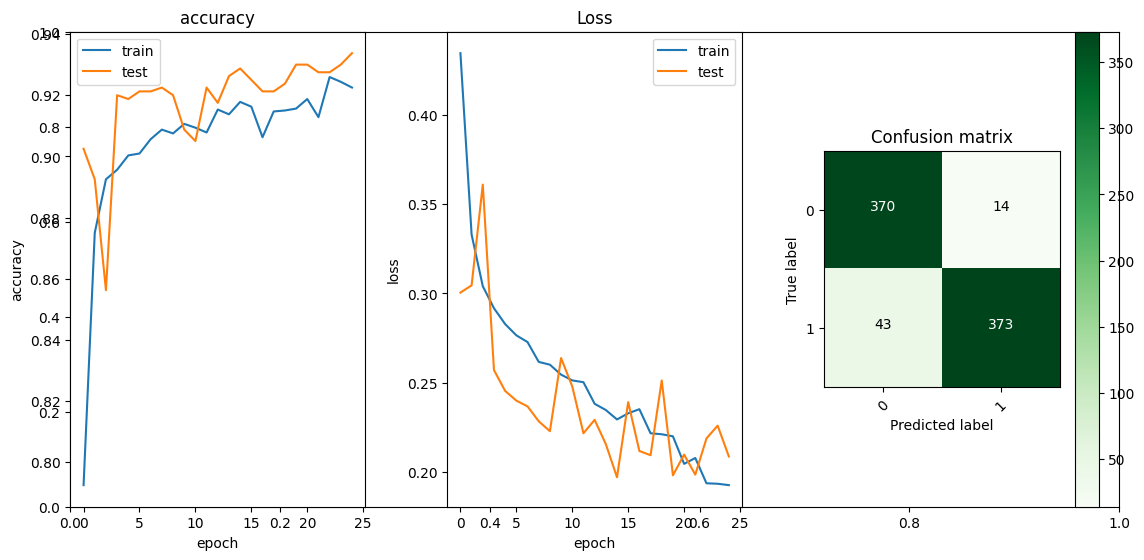

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.subplots(figsize=(12, 6))
plt.subplot(1,3,1) #horizontal,vertical,position
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.subplot(1,3,3)
Y_pred = light_cnn_model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.show()